In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [14]:
os.getcwd()

'/home/jupyter-j-moldovanova/Lesson_4_dirty_date'

In [15]:
# Данные имеют следующую структуру:

# записываются для каждого пользователя, совершившего покупки, каждый день
# для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
# внутри каждой папки есть файл data.csv, где и хранятся данные
# Схематично выглядит так:

# └── data
#    ├── 2020-12-30
#    │  ├── FirstName_LastName1
#    │  │   └── data.csv
#    │  ├── FirstName_LastName2
#    │  │   └── data.csv
#    │  └── FirstName_LastName3
#    │      └── data.csv
#    └── 2020-12-31
#       ├── FirstName_LastName1
#       │   └── data.csv
#       └── FirstName_LastName5
#           └── data.csv

In [16]:
# Для начала соберем все данные из папки data в один датафрэйм, имеющий следующие столбцы: 
# колонки из самих файлов (product_id, quantity), 
# колонка с именем пользователя (name)
# и колонка с датой этих покупок (date)
# п.с. (name) и (date) - соответствуют названию папки, где лежит папка с пользователем.

In [17]:
path = '/home/jupyter-j-moldovanova/shared/homeworks/python_ds_miniprojects/4/data'
#записали в переменную path путь до корневой папки, где лежат все данные по пользователям

In [18]:
all_data = pd.DataFrame()
# создали пустой дата фрейм, куда в дальнейшем будем считывать все данные

In [19]:
for i in os.listdir(path):    #пробегаем по каждой папке пути path
    for j in os.listdir(path+'/'+i): #даьше спускаемся еще вниз по этому же пути
        path_i = path+'/'+i #записали путь в новую переменную path_i
        path_ii = path_i.split('/')  #далее перевели эту строку в список и взяли оттуда последний элемент (это будет дата)
        for k in os.listdir(path+'/'+i+'/'+j): #спускаемся еще ниже и тоже самое проделываем для создания колонки с именем
            path_k = path+'/'+i+'/'+j
            path_kk = path_k.split('/')
            data = pd.read_csv(path+'/'+i+'/'+j+'/'+k, index_col=0) #считываем все файлы csv в data
            data['date'] = path_ii[-1] #добаляем элементы, которые брали на шаге i в созданную колонку с датой
            data['name'] = path_kk[-1] #также заполняем колонку с именем
            all_data = pd.concat([all_data, data]) #конкатенируем все дф между собой в один большой дата фрейм all_data  

In [20]:
all_data

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...
0,18,4,2020-12-07,Petr_Fedorov
1,94,4,2020-12-07,Petr_Fedorov
0,95,2,2020-12-07,Vasiliy_Ivanov
1,83,3,2020-12-07,Vasiliy_Ivanov


In [21]:
all_data.quantity.sum() #посмотрим, какое суммарно кол-во товаров было куплено в эти даты

480

In [22]:
# Выясним, какой пользователь купил больше всего товаров. 

In [24]:
all_data \
    .groupby('name', as_index=False) \ #группируем всех пользователей по именам
    .agg({'quantity' : 'sum'}) \ #для каждого пол-ля рассчитываем сколько суммарно товара он купил
    .sort_values('quantity', ascending=False) #выводим список пользователей в порядке убывания, чтобы наверху сразу увидеть искомых пользователей

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [ ]:
# Найдем топ-10 товаров по числу проданных единиц за всё время и построим барплот (столбчатую диаграмму, sns.barplot), где:

# по оси x – идентификаторы товаров (product_id) 
# # по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

In [25]:
all_data_top10_product = all_data \
    .groupby('product_id', as_index=False) \ #группируем весь дф по продуктам(по их ай ди)
    .agg({'quantity' : 'sum'}) \ #для каждого продукта просчитываем - сколько суммарно раз он был куплен
    .sort_values('quantity', ascending=False) \ #сортируем список по убыванию
    .head(10) #выводим только топ 10 покупаемых продуктов

In [27]:
all_data_top10_product

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


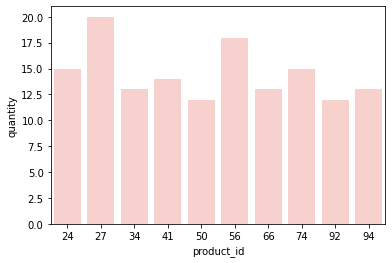

In [31]:
ax = sns.barplot(x='product_id', y='quantity', data=all_data_top10_product, color="salmon", alpha = 0.4)
#выводим эти же топ10 продуктов графически
#явно видно, что самый покупаемый продукт - с ай ди 27

In [ ]:
# Посмотрим на продажи по дням! 
# Для визуализации снова используем барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

In [32]:
all_data_salery_day = all_data \
    .groupby('date', as_index=False) \ #группируем по датам
    .agg({'quantity' : 'sum'}) \ #для каждой даты подсчитываем суммарное кол-во проданных товаров
    .sort_values('quantity', ascending=False) \ #сортируем по убыванию

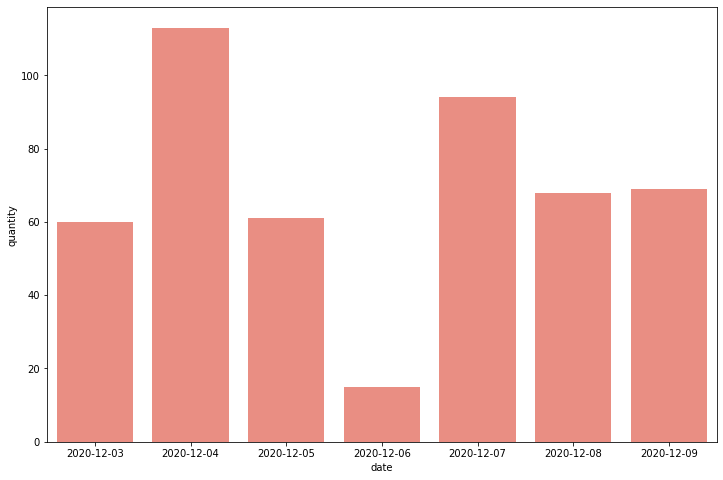

In [38]:
plt.figure(figsize=(12, 8))
ax1 = sns.barplot(x='date', y='quantity', data=all_data_salery_day, color="salmon", order=['2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09'])
#отображаем все на графике, расставив даты в удобном для чтения графика порядке

In [ ]:
# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [39]:
all_data_drop_dubl = all_data.drop_duplicates(subset=['product_id', 'name', 'date']) 
# удаляем всех пользователей, у которых в один день - куплен один и тот же продукт

In [48]:
all_data_product_dubl =  all_data_drop_dubl \
    .groupby(['name', 'product_id'], as_index=False) \ #группируем по именам -- и продуктам
    .agg({'date' : 'count'}) \ #считаем кол-во дней, в которые этот пользователь купил этот продукт
    .query('date > 1') #отбираем только тех, кто купил продукт более 1 раза

In [49]:
all_data_product_dubl

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
